<a href="https://colab.research.google.com/github/omarkhaled99/Face_recognition/blob/main/face_recognition_PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries needed in the project**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import io
from google.colab import files
import seaborn as sns
import plotly.express as px
import re
from PIL import Image
import sys
import os
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

**Unzipping the dataset after upload**

In [ ]:
!unzip /content/archive.zip -d /content/archive
!unzip /content/non_faces_scaled.zip -d /content/non_faces_scaled

# FUNCTIONS USED TO LOAD THE DATASET AND SPLIT IT

**Helper function used to read the dataset and convert it to data matrix and label vector**

In [ ]:
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):a
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList
myFileList = createFileList(path)
for file in myFileList:
  img_file = Image.open(file)
  # get original image parameters...
  width, height = img_file.size
  format = img_file.format
  mode = img_file.mode
  # Save Greyscale values
  value = np.asarray(img_file.getdata(), dtype=np.int).reshape((img_file.size[1], img_file.size[0]))
  value = value.flatten()
  images_data[count,:] = value


**loading the datasets to data matrices and vectors**

In [ ]:

faces_data,faces_labels = load_data_set('/content/archive/archive/',0)
non_faces_data,non_faces_labels = load_data_set('/content/non_faces_scaled/non_faces_scaled/',1)


/content/archive/archive/
/content/non_faces_scaled/non_faces_scaled/


**Helper function used to split the dataset with specified ratio**

In [ ]:
def split_data_set(data_matrix,labels,ratio):
  i = 0
  j=0
  k=0
  label_test  = np.zeros(int(data_matrix.shape[0]*(1-ratio)))
  label_train =  np.zeros(int(data_matrix.shape[0]*ratio))
  data_test = np.zeros(shape=(int(data_matrix.shape[0]*(1-ratio)),data_matrix.shape[1]))
  data_train = np.zeros(shape=(int(data_matrix.shape[0]*ratio),data_matrix.shape[1]))

  for i in range(data_matrix.shape[0]) :
    if ratio == 0.5:
      if (i%2)==0:
        data_test[j,:] = data_matrix[i]
        label_test[j] = labels [i]
        j = j+1
      else:
        data_train[k,:] = data_matrix[i]
        label_train[k] = labels[i]
        k=k+1
      #i = i+1
    else:
      if (i%(10))<(ratio*10):
        data_train[k,:] = data_matrix[i]
        label_train[k] = labels[i]
        k=k+1
        
      else:
        data_test[j,:] = data_matrix[i]
        label_test[j] = labels [i]
        j = j+1
      
      #i = i+1
  return data_test,label_test,data_train,label_train



**Helper function used to merge to data matrices and label vectors**

In [ ]:
def data_merge_face_non_face(data_test_faces,label_test_faces,data_train_faces,label_train_faces,
                             data_test_non_faces,label_test_non_faces,data_train_non_faces,label_train_non_faces):
  data_test = np.concatenate((data_test_faces, data_test_non_faces), axis=0)
  label_test=np.concatenate((np.ones(label_test_faces.shape[0],),label_test_non_faces),axis = 0)
  data_train = np.concatenate((data_train_faces, data_train_non_faces), axis=0)
  label_train=np.concatenate((np.ones(label_train_faces.shape[0],),label_train_non_faces),axis = 0)
  return data_test,label_test,data_train,label_train

# HELPER FUNCTIONS USED FOR CALCULATIONS AND PLOTTING

**Helper function used to calculate the mean**

In [ ]:
def get_mean(data):
  mean = np.mean(data,axis=0).reshape(data.shape[1],1)
  return mean

**Helper function used to calculate the best alpha in PCA classifier**

In [ ]:
def best_alpha(Accuracy_PCA):
  summ = Accuracy_PCA.sum(axis=1)
  print(summ)
  max_value = max(summ)
  max_index = np.where(summ == max_value)
  return  Accuracy_PCA[int(max_index[0]),:]

**Helper function used for plotting**



In [ ]:
def Graphs(x,y,title,x_Label,y_Label):
  plt.title(title)
  plt.plot(x, y)
  plt.xlabel(x_Label)
  plt.ylabel(y_Label)
  plt.show()

**Helper function to get number of eigenvalues**

In [ ]:
def number_LDA_eigens(eigen_values,alpha):
  i = 0
  sum=0
  while sum<alpha*sumEigenValues:
    sum+=eigen_values[i]
    i+=1
  R=i
  return R


# Classification Using PCA

**The PCA Class**

In [ ]:
class PCA:
  def __init__(self,data_train,data_test,label_train,label_test,faces_and_non_faces):
    self.data_train = data_train
    self.data_test = data_test
    self.label_train = label_train
    self.label_test = label_test
    self.faces_and_non_faces = faces_and_non_faces
  
  def KNN_classifier(self,X_train,y_train,X_test,y_test,kkk):
    classifier = KNeighborsClassifier(n_neighbors=kkk)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    if self.faces_and_non_faces:
      print("\nconfusion matrix\n",confusion_matrix(y_test, y_pred))
      print("\nclassification report\n",classification_report(y_test, y_pred)) 
    return metrics.accuracy_score(y_test, y_pred)

  def calculate_eigen_vectors_and_values(self):
    mean_data_train=np.mean(self.data_train ,axis=0).reshape(self.data_train .shape[1],1)
    Z_train = self.data_train  - mean_data_train.T
    cov = Z_train.T.dot(Z_train)/Z_train.shape[1]
    eigen_values, eigen_vectors = np.linalg.eigh(cov)
    eigen_values = np.flip(eigen_values)
    eigen_vectors = np.flip(eigen_vectors,axis=1)   
    return eigen_vectors,eigen_values

  def PCA_score(self,eigen_vectors,eigen_values,KKK,alphas):
    sumEigenValues=np.sum(eigen_values)
    j=0
    Accuracy=np.empty(shape=(len(alphas),len(KKK)))
    for alpha in alphas:
      if self.faces_and_non_faces:
        print("alpha = ",alpha)
        print()
      sum=0
      i=0
      while sum<alpha*sumEigenValues:
        sum+=eigen_values[i]
        i+=1
      R=i
        #print(R)
      U_r = np.delete(eigen_vectors,np.s_[int(R)+1:eigen_vectors.shape[1]],1)
      X_train=np.dot(self.data_train, U_r) 
      X_test=np.dot(self.data_test, U_r)
      y_train=self.label_train
      y_test=self.label_test
      counter = 0
      for kkk in KKK:
          #KNN call
        if self.faces_and_non_faces:
          print("k = ",kkk)
          print()
        Accuracy[j,counter] = self.KNN_classifier(X_train,y_train,X_test,y_test,kkk)
        counter+=1
      j+=1

    return Accuracy

**splitting the faces data: 50% train and 50% test**

In [ ]:

data_test_faces,label_test_faces,data_train_faces,label_train_faces = split_data_set(faces_data,faces_labels,0.5)

**running the PCA classifier for different values of alpha**

In [ ]:
## faces pca classifier
alphas=[0.8,0.85,0.9,0.95]
k = [1]
faces_and_non_faces = False
PCA_classifier = PCA(data_train_faces,data_test_faces,label_train_faces,label_test_faces,faces_and_non_faces)
eigen_vectors, eigen_values = PCA_classifier.calculate_eigen_vectors_and_values()
Accuracy_PCA_faces = PCA_classifier.PCA_score(eigen_vectors,eigen_values,k,alphas)
print(Accuracy_PCA_faces)


[[0.94 ]
 [0.94 ]
 [0.945]
 [0.935]]


**plotting the results**

In [ ]:
Graphs(alphas,Accuracy_PCA_faces,"PCA alpha values vs Accuracy","alpha value","performance measure (accuracy)")

NameError: ignored

#Classification Using LDA

**LDA classifier function for more than two classes**



In [ ]:
def LDA (data_train,data_test,label_train,label_test,KKK,NK,mean_data_train):
  
  mean = np.zeros((40,data_train.shape[1]))
  for i in range(0,data_train.shape[0],NK):
    mean[i//NK] = np.mean(data_train[i:i+NK,:], axis=0)
  B=np.empty((10304,10304))
  for i in range(0,40):
    B+=NK*np.dot((mean[i]-mean_data_train.T).T,(mean[i]-mean_data_train.T))



  data_Z=np.zeros((data_train.shape[0],data_train.shape[1]))
  j = 0
  for i in range(0,data_train.shape[0],1):
    data_Z[i,:] = data_train[i,:]-mean[i//NK,:]
 
  data_Z40=np.empty((40,NK,10304))
  for i in range(0,data_train.shape[0],NK):
    
    data_Z40[i//NK]=data_Z[i:i+NK,:]

  S=np.empty((10304,10304))
  for i in range(0,40,1):
    S+=np.dot(data_Z40[i].T,data_Z40[i])



  fixed_S = (np.triu_indices(len(S),1))
  S[fixed_S] = np.tril(S,-1).T[fixed_S]
  S_inv=np.linalg.pinv(S)
  fixed_S_inv = (np.triu_indices(len(S_inv),1))
  S_inv[fixed_S_inv] = np.tril(S_inv,-1).T[fixed_S_inv]
  SB=np.dot(S_inv,B)
  eigen_values_S, eigen_vectors_S = np.linalg.eigh(SB)

  eigen_values_S =-np.sort(-eigen_values_S)
  eigen_vectors_S = eigen_vectors_S[:,np.argsort(eigen_values_S)[::-1]]
 
 
  U = eigen_vectors_S[:,0:40]
  AT=np.dot(U.T,data_test.T)
  AT = AT.T
  A=np.dot(U.T,data_train.T)
  A = A.T

  X_train = A
  X_test = AT
  y_train=label_train
  y_test=label_test
  Accuracy=np.empty(len(KKK))
  j=0
  for kkk in KKK:
    classifier = KNeighborsClassifier(n_neighbors=kkk)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    Accuracy[j] = metrics.accuracy_score(y_test, y_pred)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))  
    j+=1
  return Accuracy
   

**Running the LDA classifier**

In [ ]:
k =[1]
Accuracy_LDA = LDA(data_train_faces,data_test_faces,label_train_faces,label_test_faces,k,5,get_mean(data_train_faces))
print(Accuracy_LDA)

[[4 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         1.0       1.00      0.80      0.89         5
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         5
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00         5
         7.0       0.62      1.00      0.77         5
         8.0       1.00      1.00      1.00         5
         9.0       1.00      1.00      1.00         5
        10.0       1.00      1.00      1.00         5
        11.0       1.00      1.00      1.00         5
        12.0       0.83      1.00      0.91         5
        13.0       0.83      1.00      0.91         5
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         5
        16.0   

# CLASSIFIER TUNING

**CHANGING K VALUE WITH PCA**

In [ ]:
alphas=[0.8,0.85,0.9,0.95]
k = [1,3,5,7]
faces_and_non_faces = False
PCA_classifier = PCA(data_train_faces,data_test_faces,label_train_faces,label_test_faces,faces_and_non_faces)
eigen_vectors, eigen_values = PCA_classifier.calculate_eigen_vectors_and_values()
Accuracy_PCA_faces = PCA_classifier.PCA_score(eigen_vectors,eigen_values,k,alphas)
print(Accuracy_PCA_faces)

[[0.94  0.855 0.815 0.775]
 [0.94  0.855 0.83  0.77 ]
 [0.945 0.85  0.82  0.75 ]
 [0.935 0.845 0.815 0.74 ]]


**plotting the results**

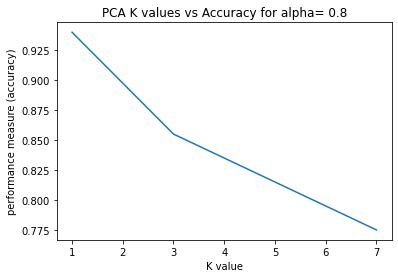

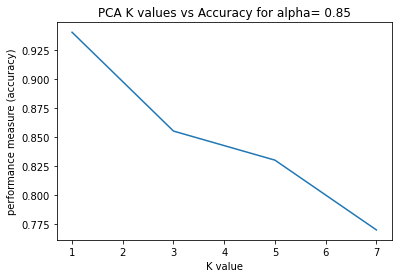

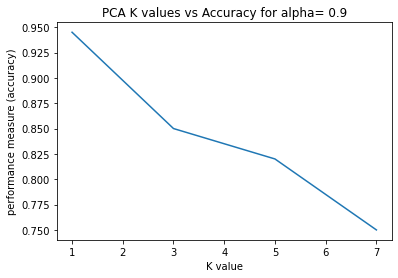

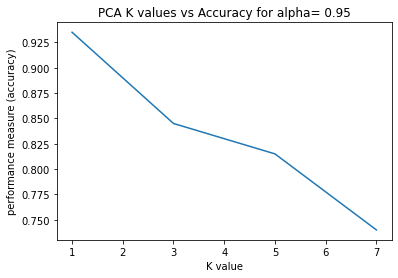

In [ ]:
i =0;
for alpha in alphas:
  Graphs(k,Accuracy_PCA_faces[i],"PCA K values vs Accuracy for alpha= {}".format(alpha),"K value","performance measure (accuracy)")
  i+=1

**CHANGING K VALUE WITH LDA**

In [ ]:
k =[1,3,5,7]
Accuracy_LDA = LDA(data_train_faces,data_test_faces,label_train_faces,label_test_faces,k,5,get_mean(data_train_faces))
print(Accuracy_LDA)

[[3 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

         1.0       1.00      0.60      0.75         5
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         5
         5.0       0.62      1.00      0.77         5
         6.0       1.00      1.00      1.00         5
         7.0       0.71      1.00      0.83         5
         8.0       1.00      1.00      1.00         5
         9.0       1.00      1.00      1.00         5
        10.0       1.00      1.00      1.00         5
        11.0       1.00      1.00      1.00         5
        12.0       1.00      1.00      1.00         5
        13.0       1.00      1.00      1.00         5
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         5
        16.0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**plotting the results**

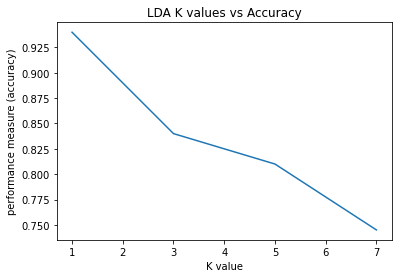

In [ ]:
Graphs(k,Accuracy_LDA,"LDA K values vs Accuracy","K value","performance measure (accuracy)")

#**Loading the non faces dataset and merging it with the faces dataset**

In [ ]:

data_test_non_faces,label_test_non_faces,data_train_non_faces,label_train_non_faces= split_data_set(non_faces_data,non_faces_labels,0.5)
data_test,label_test,data_train,label_train = data_merge_face_non_face(data_test_faces,label_test_faces,data_train_faces,label_train_faces,
                                                                       data_test_non_faces,label_test_non_faces,data_train_non_faces,label_train_non_faces)

# PCA FACES VS NON FACES

**PCA classifier with changing the number of non faces with different values of alpha**

In [ ]:
## faces vs nonfaces pca classifier
alphas=[0.8,0.85,0.9,0.95]
k = [1]
faces_and_non_faces = True
nos_of_non_faces = [50,100,150,200]
accuracies_diff_non_faces = []
for no_of_non_faces in nos_of_non_faces:
  print("faces vs nonfaces with {} non faces chosen\n".format(no_of_non_faces))
  PCA_classifier = PCA(data_train[0:data_train_faces.shape[0]+no_of_non_faces,:],
      data_test[0:data_test_faces.shape[0]+no_of_non_faces,:],
      label_train[0:label_train_faces.shape[0]+no_of_non_faces],
      label_test[0:label_test_faces.shape[0]+no_of_non_faces],
      faces_and_non_faces)
  eigen_vectors, eigen_values = PCA_classifier.calculate_eigen_vectors_and_values()
  Accuracy_PCA = PCA_classifier.PCA_score(eigen_vectors,eigen_values,k,alphas)
  print(Accuracy_PCA)
  accuracies_diff_non_faces.append(Accuracy_PCA)

faces vs nonfaces with 50 non faces chosen

alpha =  0.8

k =  1


confusion matrix
 [[ 41   9]
 [  0 200]]

classification report
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        50
         1.0       0.96      1.00      0.98       200

    accuracy                           0.96       250
   macro avg       0.98      0.91      0.94       250
weighted avg       0.97      0.96      0.96       250

alpha =  0.85

k =  1


confusion matrix
 [[ 37  13]
 [  0 200]]

classification report
               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        50
         1.0       0.94      1.00      0.97       200

    accuracy                           0.95       250
   macro avg       0.97      0.87      0.91       250
weighted avg       0.95      0.95      0.94       250

alpha =  0.9

k =  1


confusion matrix
 [[ 35  15]
 [  0 200]]

classification report
               precision    recall  f1

**plotting the results**

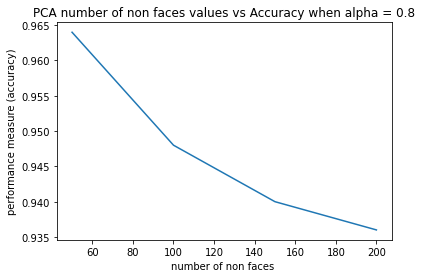

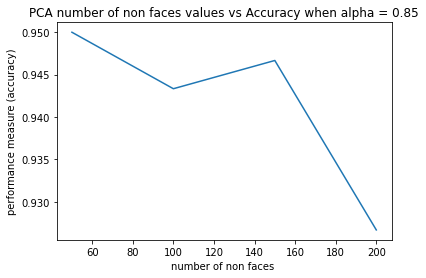

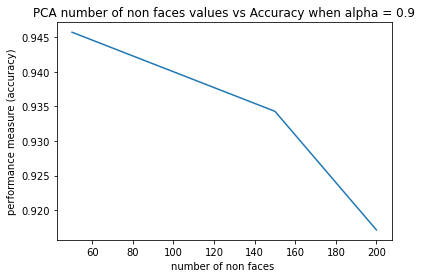

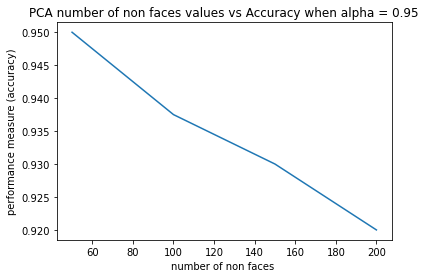

In [ ]:
i=0
for alpha in alphas:
  Graphs(nos_of_non_faces,accuracies_diff_non_faces[i],
  "PCA number of non faces values vs Accuracy when alpha = {}".format(alpha),
  "number of non faces ","performance measure (accuracy)")
  i+=1

# LDA FACES VS NON FACES

**LDA classifier function for Binary classification between two classes**

In [ ]:
def LDA_binary (data_train,data_test,label_train,label_test,no_of_faces,KKK):

    mean1 = np.mean(data_train[0:no_of_faces,:], axis=0)
    mean2 = np.mean(data_train[no_of_faces:data_train.shape[0],:], axis=0)
    B=np.empty((10304,10304))
 
    m=(mean1-mean2)
 
    m=m.reshape((1,-1))
 
    B=np.dot(m.T,m)
   
    
    z1=data_train[0:int(data_train.shape[0]),:]-mean1
    z2=data_train[int(data_train.shape[0]):data_train.shape[0],:]-mean2
    
    S=z1.T.dot(z1)+z2.T.dot(z2)
  
    S_inv=np.linalg.inv(S)
    
    eigen_values_S, eigen_vectors_S = np.linalg.eigh(np.dot(S_inv,B))
    eigen_values_S =-np.sort(-eigen_values_S)
    eigen_vectors_S = eigen_vectors_S[:,np.argsort(eigen_values_S)[::-1]]
 
    return eigen_vectors_S, eigen_values_S

**Helper function for projection and running the KNN algorithm**

In [ ]:
def  LDA_binary_projection(U,eigen_values,data_train,data_test,label_train,label_test,KKK):  
    r = 1
    print("number of eigenvectors taken:= ",r)
    X=U[:,0:r]
    AT=np.dot(X.T,data_test.T)
    AT = AT.T
    A=np.dot(X.T,data_train.T)
    A = A.T
    X_train =A
    X_test = AT
   
    y_train=label_train
    y_test=label_test
  
    Accuracy=np.empty(len(KKK))
    j=0

    for kkk in KKK:
        classifier = KNeighborsClassifier(n_neighbors=kkk)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        Accuracy[j] = metrics.accuracy_score(y_test, y_pred)
        from sklearn.metrics import classification_report, confusion_matrix
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))  
    j+=1
    return Accuracy   

**Running the LDA classifier with differnet numbers of non faces**

In [ ]:
## faces vs nonfaces LDA classifier

k = [1]
faces_and_non_faces = True
nos_of_non_faces = [50,100,150,200]
accuracies_diff_non_faces = []
for no_of_non_faces in nos_of_non_faces:
  print("faces vs nonfaces with {} non faces chosen\n".format(no_of_non_faces))
  eigen_vectors,eigen_values=LDA_binary(data_train[0:data_train_faces.shape[0]+no_of_non_faces,:],
      data_test[0:data_test_faces.shape[0]+no_of_non_faces,:],
      label_train[0:label_train_faces.shape[0]+no_of_non_faces],
      label_test[0:label_test_faces.shape[0]+no_of_non_faces],data_train_faces.shape[0],k)
  
  accuracies_diff_non_faces.append(LDA_binary_projection(eigen_vectors,eigen_values,
      data_train[0:data_train_faces.shape[0]+no_of_non_faces,:],
      data_test[0:data_test_faces.shape[0]+no_of_non_faces,:],
      label_train[0:label_train_faces.shape[0]+no_of_non_faces],
      label_test[0:label_test_faces.shape[0]+no_of_non_faces],k))
  print(LDA_binary_projection(eigen_vectors,eigen_values,
      data_train[0:data_train_faces.shape[0]+no_of_non_faces,:],
      data_test[0:data_test_faces.shape[0]+no_of_non_faces,:],
      label_train[0:label_train_faces.shape[0]+no_of_non_faces],
      label_test[0:label_test_faces.shape[0]+no_of_non_faces],k))
 


faces vs nonfaces with 50 non faces chosen

number of eigenvectors taken:=  1
[[ 31  19]
 [ 22 178]]
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        50
         1.0       0.90      0.89      0.90       200

    accuracy                           0.84       250
   macro avg       0.74      0.76      0.75       250
weighted avg       0.84      0.84      0.84       250

number of eigenvectors taken:=  1
[[ 31  19]
 [ 22 178]]
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        50
         1.0       0.90      0.89      0.90       200

    accuracy                           0.84       250
   macro avg       0.74      0.76      0.75       250
weighted avg       0.84      0.84      0.84       250

[0.836]
faces vs nonfaces with 100 non faces chosen

number of eigenvectors taken:=  1
[[ 62  38]
 [ 43 157]]
              precision    recall  f1-score   support

         0.0       0.59

**plotting the results**

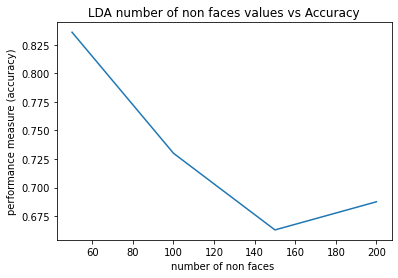

In [ ]:
Graphs(nos_of_non_faces,accuracies_diff_non_faces,"LDA number of non faces values vs Accuracy",
       "number of non faces ","performance measure (accuracy)")

# 70% train - 30% test

**Splitting the dataset with the given ratio**

In [ ]:
data_test_faces,label_test_faces,data_train_faces,label_train_faces = split_data_set(faces_data,faces_labels,0.7)

In [ ]:
print(data_test_faces,"\n")
print(label_test_faces,"\n")
print(data_train_faces,"\n")
print(label_train_faces)

[[ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 [ 34.  34.  33. ...  37.  40.  33.]
 ...
 [125. 119. 124. ...  36.  39.  40.]
 [119. 120. 120. ...  89.  94.  85.]
 [125. 124. 124. ...  36.  35.  34.]] 

[ 1.  1.  1.  2.  2.  2.  3.  3.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.
  7.  7.  7.  8.  8.  8.  9.  9.  9. 10. 10. 10. 11. 11. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 19. 19. 20. 20. 20. 21. 21. 21. 22. 22. 22. 23. 23. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29. 30. 30. 30.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 34. 34. 34. 35. 35. 35. 36. 36. 36.
 37. 37. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.] 

[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [128. 125. 125. ...  85.  90.  84.]
 [123. 121. 126. ...  40.  35.  42.]
 [129. 127. 133. ...  93.  93.  93.]] 

[ 1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  

**Running the PCA Classifier**

In [ ]:
alphas=[0.8,0.85,0.9,0.95]
k = [1]
faces_and_non_faces = False
PCA_classifier = PCA(data_train_faces,data_test_faces,label_train_faces,label_test_faces,faces_and_non_faces)
eigen_vectors, eigen_values = PCA_classifier.calculate_eigen_vectors_and_values()
Accuracy_PCA_faces = PCA_classifier.PCA_score(eigen_vectors,eigen_values,k,alphas)
print(Accuracy_PCA_faces)

[[0.95833333]
 [0.96666667]
 [0.95833333]
 [0.95      ]]


**Running the LDA Classifier**

In [ ]:
k =[1]
Accuracy_LDA = LDA(data_train_faces,data_test_faces,label_train_faces,label_test_faces,k,7,get_mean(data_train_faces))
print(Accuracy_LDA)